# Random Number Generators

In [1]:
import numpy as np 
import pandas as pd
import scipy as sp 
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng()

## Bernoulli distribution
- Simulate Bernoulli Distribution by tossing a coin with probability of heads p
- Show how the law of large number work


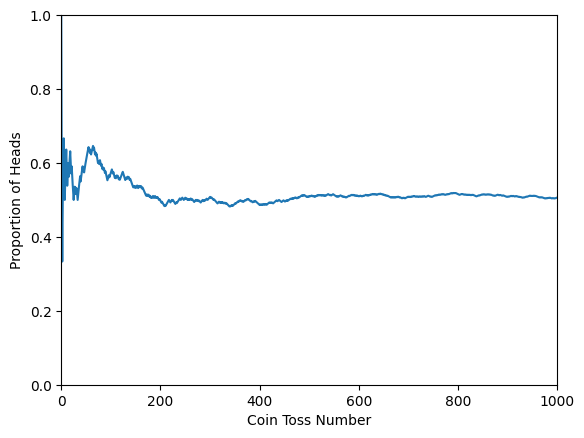

In [3]:
# Bernoulli distribution 
def bernoulli(p, n) : 
    U = rng.random(n)
    return U < p

# Show Law of large number
n = 10000
p = 0.5
toss = bernoulli(p, n)
avg = [sum(toss[:i]) / i for i in range(1, n + 1)]
plt.plot(avg)
plt.xlabel("Coin Toss Number")
plt.ylabel("Proportion of Heads")
plt.axis([0, 1000, 0, 1])
plt.show()

## Normal Distribution

- Gaussian distribution is the most important and foundational probability distribution. The 1-d form is the following $$ f(x) = \frac {e^{\frac {-(x-\mu)^2}{2\sigma^2} }} {\sqrt{2\pi\sigma^2}} $$ with $ E(x) = \mu, Var(x) = \sigma^2 $

- The multidimensional version for $ x \in R^n $ is following : $$ f(x) = \frac {1} {\det(2\pi R)^{\frac 1 2}} e^{-\frac 1 2 (x - \mu)^TR^{-1}(x-\mu)} $$
with R is the covariance matrix : $ R_{i,j} = E[(x_i - \bar x_i)(x_j - \bar x_j)] $

- Key property of normal distribution : 
    - It is completely specified by its first two moments 
    - It is preserved under linear transformation

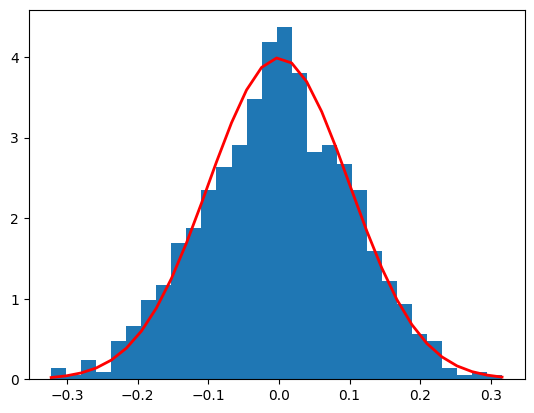

In [4]:
# Draw sample from the distribution 
mu = 0
sigma = 0.1

normal_dis = np.random.normal(mu, sigma, 1000)
# bins is an number, it defines the number of equal-with bins in the range
# density = True, draw and return a probability density
count, bins, inored = plt.hist(normal_dis, 30, density = True )
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi))  * np.exp(- (bins - mu)**2 / (2 * sigma ** 2)), linewidth = 2, color = 'r' )
plt.show()

## Multinomial Distribution 
- The multimoial distribution generalizes the binomila distribution. To explain, Consider the problem of n balls to be divided among r bins, where each bin may accommodate more than one ball. The probability that a ball lands in the ith bin is p where sum of all p equal to 1. The binomial distribution is a special case of multinomila distribution with n = 2

In [5]:
# visualization by python
from scipy.stats import multinomial

# first parameter is the number of trials
# second parameter is a array that contain probability of a trial falling into each category. 
ex = multinomial(10, [1/2] * 2) 

# draw random samples from distribution
ex.rvs(4)

array([[5, 5],
       [4, 6],
       [5, 5],
       [6, 4]])

- We define the occupancy vector $e_i \in R^r $ which is a binary vector with exactly one nonzero component. 
- $N_n$ vector can be written as the sum of n vectors X, each drawn from the set $ \{ e_j \} ^r _{j = 1} $ : $$ N_n = \sum ^n _{i = 1} X_i $$ 
- Because X vector are independent and identically distributed so we can easily establish below equality : $$ P(N_n = x) = C_n p_1^{x_1}p_2^{x_2}...p_r^{x_r} $$ with $C_n$ is combinatorial factor that accounts for all the ways a component can sum to $x_j$. We can compute it by below fomular : $$ C_n = \frac {n!} {x_1!x_2!x_3!....x_r!} $$
- The expectation of this distribution is the following : $$ E[N_n] = \sum ^n _{i = 1} p_i $$
- Covariance matrix : $$ Cov(N_n) = ndiag(p) - npp^T $$
- <a href = "https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multinomial.html">Related document  <a>

## Chi-Square Distribution
- Suppost that we have n independent random variables $X_i$ such that $ X_i \rightarrow N(0, 1)$. We are interested in the following random variable $ R = \sqrt{\sum _iX^2_i} $
- First of all, we define X which represents a vector of $X_i$ random variables. Because $X_i$ is a independent random variables so the joint probability density of $X_i$ is the following : $$ f_X(X) = \frac {e^{-\frac 1 2  \sum _i X_i^2}} {(2\pi)^{\frac n 2}} $$
- You can easily imagine thr R as the radius of an n-dimensional sphere. The volumns of this sphere is given by the following formula : $$ V_n(R) = \frac {\pi ^{\frac n 2}}{\varGamma(\frac n 2 + 1)} R^n $$ with $ \varGamma $ denots the gamma function.
- To explain more clearly, we define Chi-square distribution is a continuous probability distribution that is used in many hypothesis tests. The shape of it is determined by the parameter k which is the number of independent randome variables in X. In other word, we can say chi-square is the sum of square of standard normal distribution 

![Local Image](./Image/chi-square.png)

- Chi-square distribution start at zero and continue to infinity. The mean of the chi-square distribution is k, and the variance is 2k
- Previously, we mentioned that the chi-square distribution is useful for hyphothesis testing. We will now discuss its application in more detail. 


### Pearson's chi-square test
- Pearson's chi-square tests are statistical  tests for categorical data. They're used to determine whether your data are significantly different from what you expected. 
- Pearson's chi-square test statistic : $$ X^2 = \sum \frac {(O - E)^2} {E} $$ with O is observed frequency, E is expected frequency
- Pearson's chi-square test is the most popular case of the chi-square goodness of fit test. A chi-square goodness of fit test is a goodness of fit test for a categorical variable. Goodness of fit is a measure of how well a statistical model fits a set of observations.

Example : We have a table with three types as columns, observations and frequencies as rows. The question we need to answer is the given frequencies is the same as the frequencies in this observations, isn't it ? 

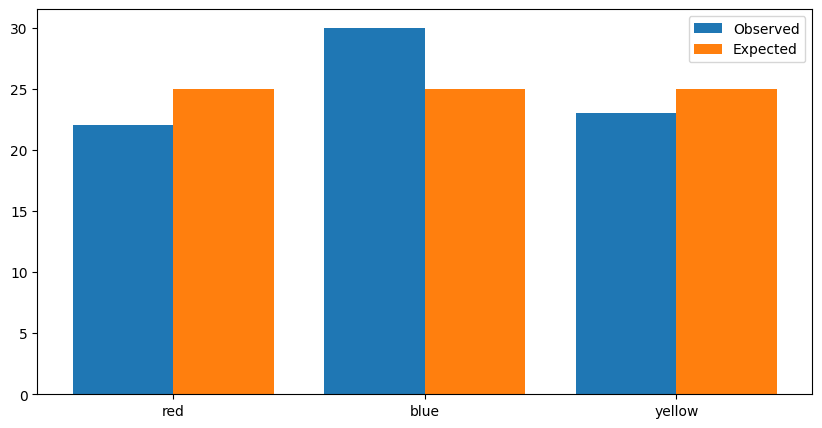

In [6]:
t1_df = pd.DataFrame(data= {
    "red" : [22, 25],
    "blue" : [30, 25], 
    "yellow" : [23, 25]
})
observe = t1_df.iloc[0]
expect = t1_df.iloc[1]
x_axis = np.arange(len(observe))

fig, ax =  plt.subplots(figsize = (10, 5))
ax.bar(x_axis - 0.2, observe,0.4, label = "Observed")
ax.bar(x_axis + 0.2, expect,0.4, label = "Expected" )
ax.set_xticks(x_axis)
ax.set_xticklabels(t1_df.columns)
ax.legend()
plt.show()


In [7]:
# using scipy 
from scipy.stats import chisquare
print(chisquare(f_obs= observe, f_exp= expect))

Power_divergenceResult(statistic=1.5199999999999998, pvalue=0.46766642700990935)


In [8]:
# choose significant level = 0.05 
chis_test = sum([(observe[i] - expect[i])**2 / expect[i] for i in range(len(expect))])
print(chis_test)

1.5199999999999998


C:\Users\Asus\AppData\Local\Temp\ipykernel_27672\4011476366.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  chis_test = sum([(observe[i] - expect[i])**2 / expect[i] for i in range(len(expect))])


![Local Image](./Image/chi-square-table.png)

- significant level < p-value => don't reject $H_0$

## Poisson and Exponential Distribution

### Poisson distribution 
- Poisson distribution for a random variable X  represents a number of outcomes occurring in a given time interval (t) $$ p(x, \lambda t) = \frac {e^{-\lambda t}(\lambda t)^x} {x!} $$  
- Poisson distribution is closely related to the binomial distribution where p is small and n is large
- Poisson is used to compute the probability of specific number of events during a particular time period. 

In [9]:
# poisson distribution in scipy.stats 
from scipy.stats import poisson 
x = poisson(3) 
print(x.pmf(6))

0.05040940672246224


### Exponential distribution
- In many cases of poisoon distribution, time period itself is the random variable. If we consider case that the time between arrivals of vehicles at a checkpoint. The probability of no events occuring in the span of time up to t is given by the following : $$ p(0, \lambda t) = e^{-\lambda t} $$
- Taking the derivative gives the exponential distribution : $$ f_X(x) = \lambda e^{-\lambda x} $$
- So we can conclude that the exponential distribution is used to compute the time between two event

In [10]:
from scipy.stats import expon
loc = 0 # vị trí trung tâm của phân phối 
scale = 5 # độ trải rộng của phân phối
x = expon(0,5)
print(x.pdf(10))
print(expon.pdf((10 - loc) / scale) / scale)

0.027067056647322542
0.027067056647322542


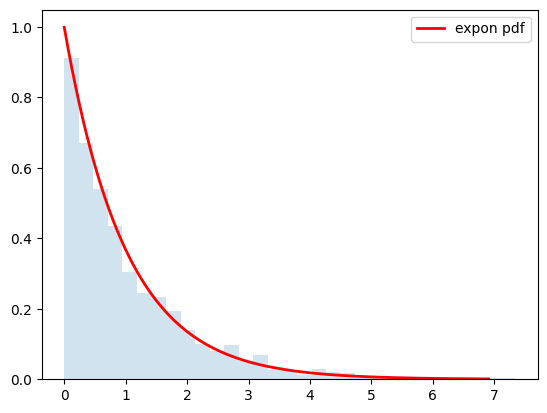

In [11]:
fig, ax = plt.subplots(1,1)
r =  expon.rvs(size = 1000)
x = np.linspace(expon.ppf(0.001),
                expon.ppf(0.999), 1000)
ax.plot(x, expon.pdf(x),
       'r-', lw=2, alpha=1, label='expon pdf')
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.legend()
plt.show()


## Gamma distribution
- The random variable X for the time until a specified number ($\alpha$) of Poisson event is described by the gamma distribution. The exponential distribution is a special case of gamma distribution when $ \alpha = 1 $ and $\beta = \frac 1 {\lambda} $. The gamma distribution is the following : $$ f(x, \alpha, \beta) = \frac {\beta ^{- \alpha}x^{\alpha - 1}e^{-x/\beta}} {\varGamma(\alpha)} $$ and $\varGamma(\alpha)$ is gamma function
- The gamma distribution has $ E(X) = \alpha \beta , V(X) = \alpha \beta ^2 $

In [12]:
from scipy.stats import gamma
x = gamma(2, scale = 1/5)
print(x.cdf(1))

0.9595723180054873


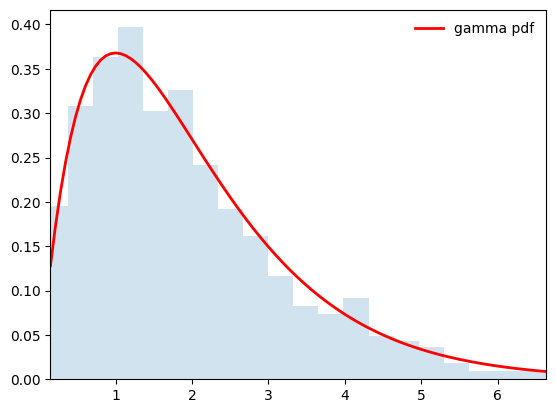

In [13]:
fig, ax = plt.subplots(1,1)
alpha = 2
x = np.linspace(gamma.ppf(0.01, alpha), gamma.ppf(0.99, alpha), 100)
ax.plot(x, gamma.pdf(x, alpha), 'r-', lw = 2, label = 'gamma pdf')

r = gamma.rvs(alpha, size = 1000)
ax.hist(r, density = True, bins = "auto", histtype='stepfilled', alpha = 0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

## Beta Distribution
- The uniform distribution assigns a single constant value over the unit interval. The beta distribution generalizes this to a function over the unit interval. The probability density function of the beta distribution is the following : $$ f(x) = \frac 1 {\beta(a, b)} x^{a - 1}(1 - x)^{b - 1} $$ where $$ \beta(a, b) = \int ^1_0 x^{\alpha - 1}(1 - x) ^{b - 1}dx $$
and if a = b = 1 yields the uniform distribution
- Beta distribution is a conjugate distribution of the binomial distribution

In [14]:
from scipy.stats import beta
x = beta (1,1)
print(x.cdf(1))

1.0


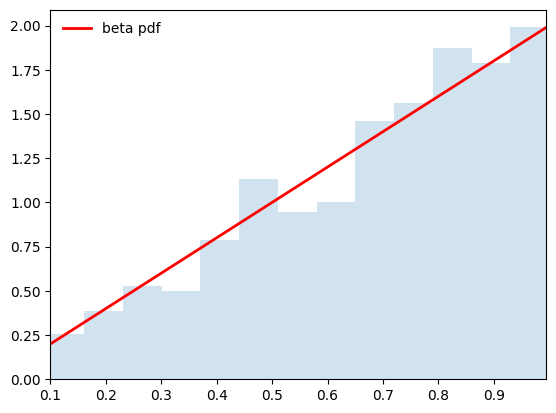

In [15]:
fig, ax = plt.subplots(1,1)
alpha = 2
b = 1
x = np.linspace(beta.ppf(0.01, alpha, b), beta.ppf(0.99, alpha, b), 100)
ax.plot(x, beta.pdf(x, alpha, b), 'r-', lw = 2, label = 'beta pdf')

r = beta.rvs(alpha, b, size = 1000)
ax.hist(r, density = True, bins = "auto", histtype='stepfilled', alpha = 0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

## Dirichlet-Multinomial Distribution
- The dirichlet-multinomial distribution arises in situation where the usual multinomila distribution is inadequate. 
- <a href = "https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multinomial.html">Related document  <a>

In [16]:
from scipy.stats import dirichlet
d = dirichlet([1,1,1])
d.rvs(3)

array([[0.27255002, 0.68423496, 0.04321502],
       [0.53644297, 0.44450708, 0.01904995],
       [0.04848629, 0.83942804, 0.11208567]])

## Negative Binomial Distribution
- The negative binomial distribution is used to characterize the number of trials untils a specified number of failures occur. The probability mass function is the following : $$ P(k) = C^{n + k - 1}_{n - 1} p^n(1-p)^k $$
- Mean : $$ E[k] = \frac {n(1-p)}{p} $$
- Variance : $$ Var(k) = \frac {n(1-p)} {p^2} $$

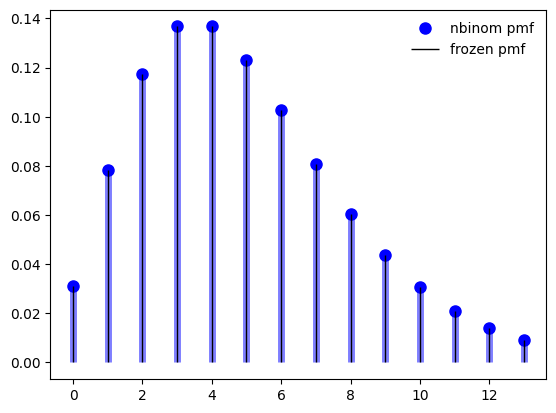

In [17]:
from scipy.stats import nbinom

fig, ax = plt.subplots(1,1)
n = 5
p = 0.5
x = np.arange(nbinom.ppf(0.01, n, p), nbinom.ppf(0.99, n, p))
ax.plot(x, nbinom.pmf(x, n, p), 'bo', ms=8, label='nbinom pmf')
ax.vlines(x, 0, nbinom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
rv = nbinom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

## Negative Multinomial Distribution
- The discrete negative multinomila distribution is an extension of negative binomial distribution to account for more than two possible outcomes. (đếm sự kiện dừng của nhiều biến ngẫu nhiên hơn)


In [27]:
import random 
from collections import  Counter

n = 2
p = [1/3, 1/2]
items = ['a', 'b', 'F'] # hai sự kiện quan sát
nc =  0
seq = []
# đếm cho đến khi số lần fail là 2 
while nc < n : 
    v, = random.choices(items, p + [1  - sum(p)])
    seq.append(v)
    nc += (v == 'F')

c = Counter(seq)
print(c)

Counter({'a': 8, 'b': 6, 'F': 2})


In [28]:
from scipy.special import factorial 

def negative_multinom_pdf (p, n) : 
    assert len(n) == len(p)
    term = [i **j for i, j in zip(p, n)]
    num = np.prod(term) * (1 - sum(p)) * factorial(sum(n)) # return the product of array element over a given axis
    den = np.prod([factorial(i) for i in n])
    return num / den

negative_multinom_pdf(p, [c['a'], c['b']])

0.0011919391098917846

# Excercise